# Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pour afficher les graphiques en ligne dans un notebook Jupyter
%matplotlib inline

# Import CSV

Import data with the read_csv method from pandas library to visualize the data.

In [2]:
sales_data = pd.read_csv("sales.csv")

In [3]:
sales_data

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...,...
640835,359783,409,6,2013-10-26,483,1,0,0,0,4553
640836,152315,97,1,2014-04-14,987,1,1,0,0,12307
640837,117952,987,1,2014-07-07,925,1,0,0,0,6800
640838,435829,1084,4,2014-06-12,725,1,0,0,0,5344


In [4]:
sales_data.isna()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
640835,False,False,False,False,False,False,False,False,False,False
640836,False,False,False,False,False,False,False,False,False,False
640837,False,False,False,False,False,False,False,False,False,False
640838,False,False,False,False,False,False,False,False,False,False


In [5]:
print(sales_data.columns)

Index(['Unnamed: 0', 'store_ID', 'day_of_week', 'date', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday', 'sales'],
      dtype='object')


The Unnamed:0 column can become the index column because each value is unique and there is no duplicate.
=> Has become uid for cleared understanding

In [6]:
sales_df = sales_data.rename(columns={"Unnamed: 0": "uid"})
sales_df = sales_df.set_index(["uid"])

In [7]:
sales_df

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
uid,,,,,,,,,
425390,366,4,2013-04-18,517,1,0,0,0,4422
291687,394,6,2015-04-11,694,1,0,0,0,8297
411278,807,4,2013-08-29,970,1,1,0,0,9729
664714,802,2,2013-05-28,473,1,1,0,0,6513
540835,726,4,2013-10-10,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...
359783,409,6,2013-10-26,483,1,0,0,0,4553
152315,97,1,2014-04-14,987,1,1,0,0,12307
117952,987,1,2014-07-07,925,1,0,0,0,6800


In [8]:
sales_df.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
uid,,,,,,,,,
425390,366,4,2013-04-18,517,1,0,0,0,4422
291687,394,6,2015-04-11,694,1,0,0,0,8297
411278,807,4,2013-08-29,970,1,1,0,0,9729
664714,802,2,2013-05-28,473,1,1,0,0,6513
540835,726,4,2013-10-10,1068,1,1,0,0,10882


# DataViz

## Visualize the data

Sales by store ID

Visualize each feature compared to the target variable : sales.

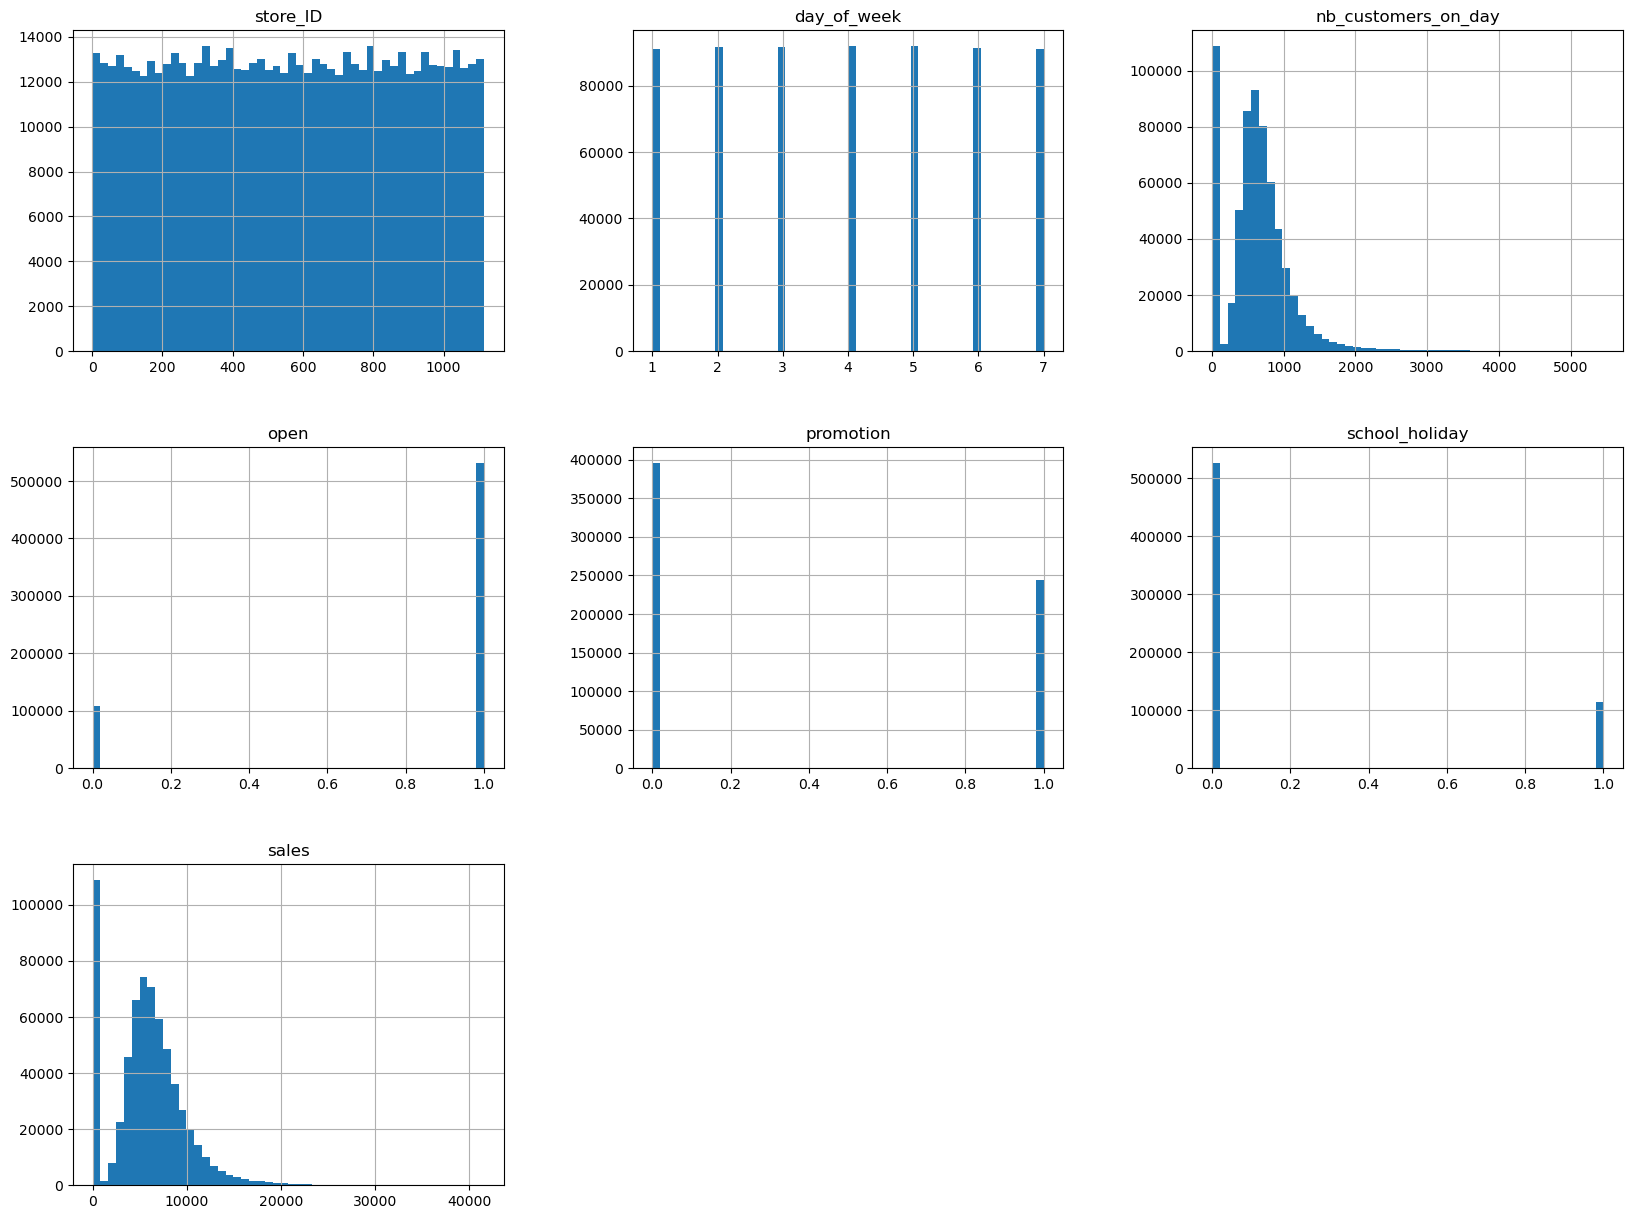

In [9]:
sales_df.hist(bins=50, figsize=(20, 15))
plt.show()

# Feature engineering

Feature selection

In [10]:
sales_df.columns

Index(['store_ID', 'day_of_week', 'date', 'nb_customers_on_day', 'open',
       'promotion', 'state_holiday', 'school_holiday', 'sales'],
      dtype='object')

Convert state_holiday from str to int.

In [11]:
# sales_df = pd.get_dummies("sales_df", columns=["school_holiday"], drop_first=True)

In [12]:
# sales_df

Drop the columns that are not useful for our analysis.

drop uid ? / meaningless ? 
xgBoost ? Other models ? Cross validation to gain confidence on the results


In [13]:
X = sales_df.drop(columns=["date", "open", "sales"])
y = sales_df["sales"]

In [14]:
X.head()

,store_ID,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday
uid,,,,,,
425390,366,4,517,0,0,0
291687,394,6,694,0,0,0
411278,807,4,970,1,0,0
664714,802,2,473,1,0,0
540835,726,4,1068,1,0,0


In [15]:
X["state_holiday"].unique()

array(['0', 'a', 'c', 'b'], dtype=object)

Because state_holiday is a categorical variable, we can convert it to a numerical variable using the label encoding method.

In [16]:
from sklearn import preprocessing
converted = preprocessing.LabelEncoder()
converted.fit(['0','a', 'b', 'c', 'd'])
X["state_holiday"] = converted.transform(X["state_holiday"])

We check again the data type of the column to see if the conversion was successful.

In [17]:
X["state_holiday"].unique()

array([0, 1, 3, 2])

In [18]:
y.head()

uid
425390     4422
291687     8297
411278     9729
664714     6513
540835    10882
Name: sales, dtype: int64

Just to make sure, we compare the shapes of y and X to see if they are the same.

In [19]:
print(f"Shape of X => {X.shape}")
print(f"Shape of y => {y.shape}")

Shape of X => (640840, 6)
Shape of y => (640840,)


# Train-test split

We split the data into training and testing sets using the train_test_split method from the sklearn library.
We set the random_state to 42 to ensure that the results are reproducible.

In [20]:
from sklearn.model_selection import train_test_split

# KFold / Or Bootstraping with other random state

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize the data to ensure that all variables are on the same scale, which can improve model performance and numerical stability.

minMax scaler

In [21]:
# Import StandardScaler.
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate StandardScaler.
scaler = MinMaxScaler()

# Fit and transform training data.
X_train_scaled = scaler.fit_transform(X_train)

# Also transform test data.
X_test_scaled = scaler.transform(X_test)

We now create a linear regression model using the LinearRegression method from the sklearn library.
We fit the model to the training data using the fit method.

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

We predict the target variable using the predict method on the test data.

In [23]:
y_pred = lin_reg.predict(X_test_scaled)

We evaluate the model using the mean squared error (MSE) and R-squared (R2) metrics from the sklearn library.

In [24]:
# Import metrics.
from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print R^2 score.
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

# Calculate and print MSE score.
mse = mean_squared_error(y_test, y_pred) / 1_000_000
print(f"MSE: {mse:.4f}")

rmse = (mse / 1_000_000) ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

R-squared: 0.8401
MSE: 2.3643
Root mean squared error: 0.0015


In [25]:
#Save the model to disk (it can alternatively be stored in a string)
import pickle
ofname = open('linear_model_v1.pkl', 'wb')
s = pickle.dump(lin_reg,ofname)
ofname.close()
print (s)

#Clear the namespace
# %reset -f

None


In [26]:
#Check we don't have the variable in the namespace. This should give a NameError
# print(lin_reg)

In [27]:
ofname = open('linear_model_v1.pkl','rb') #Open in binary format. You never know how it was saved.
lin_reg_import = pickle.load(ofname)

In [28]:
y_pred_import = lin_reg_import.predict(X_test_scaled)

In [29]:
# Import metrics.
from sklearn.metrics import mean_squared_error, r2_score

# Calculate and print R^2 score.
r2 = r2_score(y_test, y_pred_import)
print(f"R-squared: {r2:.4f}")

# Calculate and print MSE score.
mse = mean_squared_error(y_test, y_pred_import) / 1_000_000
print(f"MSE: {mse:.4f}")

rmse = (mse / 1_000_000) ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

R-squared: 0.8401
MSE: 2.3643
Root mean squared error: 0.0015
